使用对应阶数的历史时点负荷构建预测特征

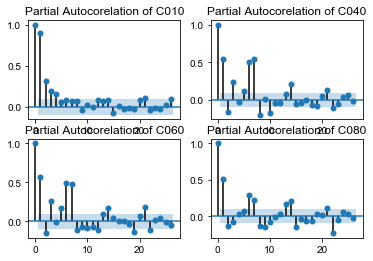

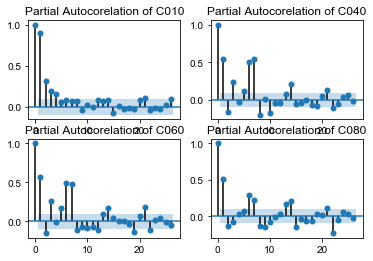

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
import pandas as pd
p = pd.read_csv("p.csv")

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()
plot_pacf(p.C010,ax=ax0,title="Partial Autocorelation of C010")
plot_pacf(p.C040,ax=ax1,title="Partial Autocorelation of C040")
plot_pacf(p.C060,ax=ax2,title="Partial Autocorelation of C060")
plot_pacf(p.C080,ax=ax3,title="Partial Autocorelation of C080")

我们从整理的时点负荷数据与对应日期的天气数据出发，通过计算两两指标的相关系数，我们得到相关性热力图。

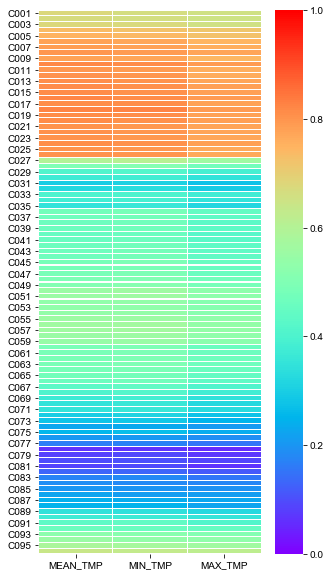

In [6]:
import seaborn as sns
import matplotlib.pyplot as pl
cols = p.columns[[x.startswith('C') for x in p.columns]]
temps = ['MEAN_TMP','MIN_TMP','MAX_TMP']
t0 = pd.DataFrame([[p[t].corr(p[x]) for x in temps] for t in cols])
t0.columns = temps
t0.index = cols
plt.figure(figsize=(5,10))
sns.heatmap(t0, linewidths = 0.05, vmax=1, vmin=0, cmap='rainbow') 

选择不同的气象因素，用于建立预测模型

Text(0.5, 0, '$samples$')

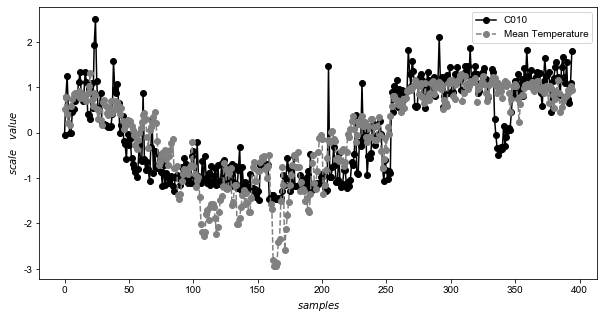

In [8]:
import numpy as np
plt.figure(figsize=(10,5))

def scale(x):
    return (x - np.mean(x))/np.std(x)

plt.plot(range(p.shape[0]),scale(p.C010.values),'o-',c='black',label="C010")
plt.plot(range(p.shape[0]),scale(p.MEAN_TMP.values),'o--',c='gray',label="Mean Temperature")
plt.legend()
plt.ylabel("$scale \quad value$")
plt.xlabel("$samples$")

工作日类型主要指周一到周日的这七天，一般来说周一到周五与周末的用电规律具有明显的区别，另外，周一和周五由于邻近周末，一般也会表现得与周二到周四的用电规律不一样。这里我们选择第40、60个时点，按周一到周日的顺序绘制每种工作日类型的平均负荷水平，得到二维图表

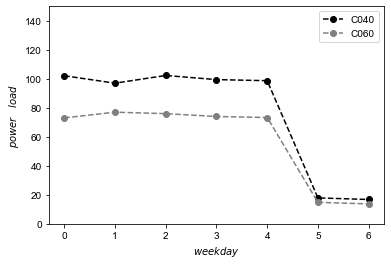

In [9]:
t0 = p.groupby('weekday').mean()[['C040','C060']]
plt.plot(range(7),t0.C040,'o--',c='black',label="C040")
plt.plot(range(7),t0.C060,'o--',c='gray',label="C060")
plt.ylim(0,150)
plt.xlabel("$weekday$")
plt.ylabel("$power\quad load$")
plt.legend()